<a href="https://colab.research.google.com/github/LeonVillanueva/CoLab/blob/master/Google_CoLab_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Data

In [1]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 69kB/s 
     |████████████████████████████████| 3.1MB 45.6MB/s 
     |████████████████████████████████| 501kB 2.8MB/s 


In [0]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
tf.__version__

'2.0.0-beta1'

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
print (np.max (X_train))
print (np.max (X_test))

255
255


In [14]:
X_train = X_train / np.max (X_train)
X_test = X_test / np.max (X_test)
X_train.shape

(60000, 28, 28)

# Model

In [0]:
M, N, D = X_train.shape

In [0]:
layers_multi =  [tf.keras.layers.Flatten (input_shape=(D,D)),
                 tf.keras.layers.Dense (256, activation='relu'),
                 tf.keras.layers.Dropout (0.25),
                 tf.keras.layers.Dense (10, activation='softmax')]

In [0]:
multi = tf.keras.models.Sequential (layers_multi)

In [0]:
adam = tf.keras.optimizers.Adam (learning_rate=0.0001, decay=1e-6)

In [0]:
multi.compile (optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [0]:
%%capture
m = multi.fit (X_train, y_train, validation_data=(X_test, y_test), epochs=10)

In [53]:
print ('Training Set Evaluation : ' + str(multi.evaluate (X_train, y_train)))
print ('Test Set Evaluation : ' + str(multi.evaluate (X_test, y_test)))

60000/60000 [==============================] - 3s 51us/sample - loss: 0.0780 - accuracy: 0.9786
Training Set Evaluation : [0.07804391047917307, 0.97863334]
10000/10000 [==============================] - 1s 53us/sample - loss: 0.0955 - accuracy: 0.9719
Test Set Evaluation : [0.09545387514904141, 0.9719]


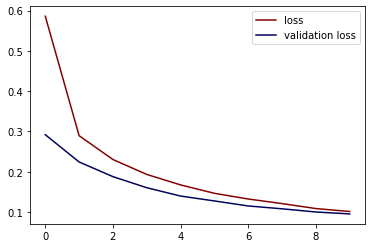

In [54]:
plt.plot (m.history['loss'], label='loss', color='#840000')
plt.plot (m.history['val_loss'], label='validation loss', color='#00035b')
plt.legend ()

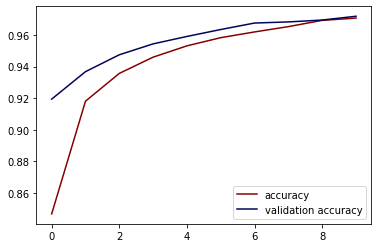

In [55]:
plt.plot (m.history['accuracy'], label='accuracy', color='#840000')
plt.plot (m.history['val_accuracy'], label='validation accuracy', color='#00035b')
plt.legend ()

# Confussion Map Evaluation
> *https://androidkt.com/keras-confusion-matrix-in-tensorboard/*

In [0]:
y_pred = multi.predict_classes (X_test)

In [0]:
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

### Normalize and Graph

In [0]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

In [0]:
con_mat_df = pd.DataFrame(con_mat_norm)

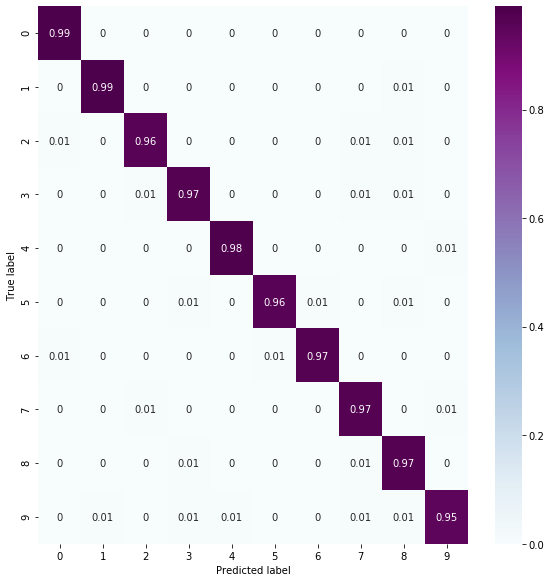

In [82]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.BuPu)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
misclass = np.where (y_pred != y_test)[0]

In [0]:
i = np.random.choice (misclass)

Text(0.5, 1.0, 'True: 9, Predicted: 4')

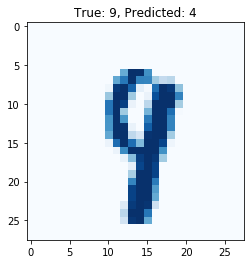

In [90]:
plt.imshow (X_test[i], cmap='Blues')
plt.title ('True: %s, Predicted: %s' % (y_test[i], y_pred[i]))